## Import Packages

In [56]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## Example 1 - A simple cost function

$f(x) = x^2 + x + 1$

In [57]:
def f(x):
    return x**2 + x + 1

In [58]:
# Make Data

x_1 = np.linspace(start = -3, stop = 3, num = 500)

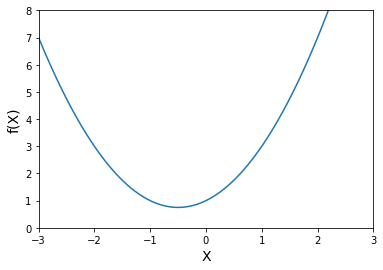

In [59]:
# plot
plt.xlim([-3, 3])
plt.ylim([0, 8])

plt.xlabel('X', fontsize = 14)
plt.ylabel('f(X)', fontsize = 14)

plt.plot(x_1, f(x_1))
plt.show()

## Slope and Derivatives
Create a python function to find derivative of f(x) called df(x)

In [60]:
def df(x):
    return (2*x + 1)

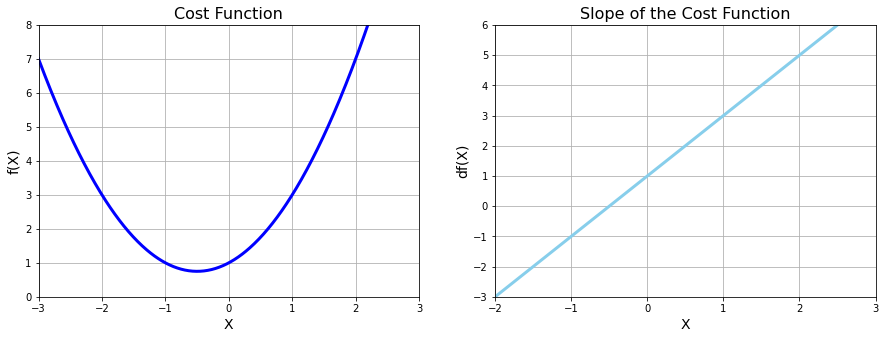

In [61]:
# plot function and derivative side by side

plt.figure(figsize=[15, 5])

# Chart-1 for cost function
plt.subplot(1, 2, 1)

plt.xlim([-3, 3])
plt.ylim([0, 8])

plt.title('Cost Function', fontsize = 16)
plt.xlabel('X', fontsize = 14)
plt.ylabel('f(X)', fontsize = 14)
plt.grid()

plt.plot(x_1, f(x_1), color = 'blue', linewidth = 3)

# Chart-2 for Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the Cost Function', fontsize = 16)
plt.xlabel('X', fontsize = 14)
plt.ylabel('df(X)', fontsize = 14)
plt.grid()

plt.xlim([-2, 3])
plt.ylim([-3, 6])

plt.plot(x_1, df(x_1), color = 'skyblue', linewidth = 3)


plt.show()

## Gradient Descent

In [62]:
# Gradient Descent

new_x = 3
previous_x = 0
step_multiplier = 0.1
precision = .0001

x_list = [new_x]
slope_list =[df(new_x)]

for n in range(500):
    previous_x = new_x
    gradient = df(previous_x)
    new_x = previous_x - step_multiplier * gradient
    
    step_size = abs(new_x - previous_x)
    #print(step_size)
    
    x_list.append(new_x)
    slope_list.append(df(new_x))
    
    if step_size < precision:
        print('Loop ran this many times:', n)
        break
    
print('Local minimum occurs at:', new_x)
print('Slope od df(x) value at this point si:', df(new_x))
print('f(x) value or cost at this point is:', f(new_x))

Loop ran this many times: 40
Local minimum occurs at: -0.49962781616118024
Slope od df(x) value at this point si: 0.0007443676776395236
f(x) value or cost at this point is: 0.7500001385208099


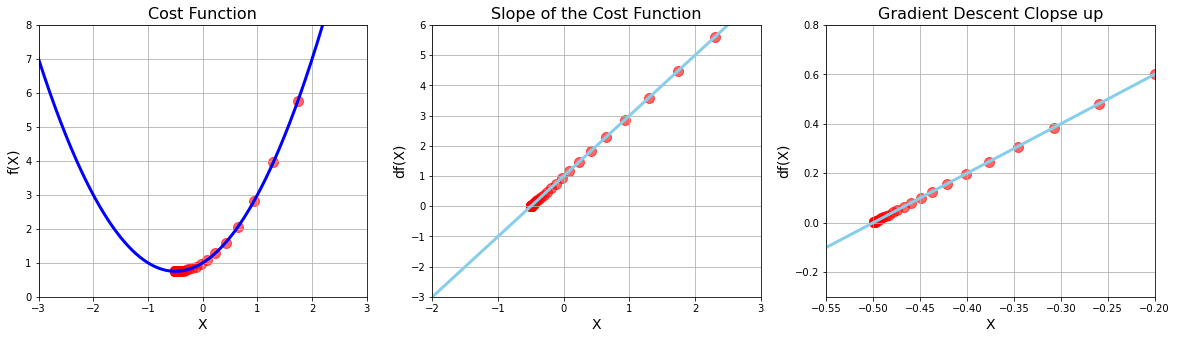

In [63]:
# Gradient descent on plot

plt.figure(figsize=[20, 5])

# Chart-1 for cost function
plt.subplot(1, 3, 1)

plt.xlim([-3, 3])
plt.ylim([0, 8])

plt.title('Cost Function', fontsize = 16)
plt.xlabel('X', fontsize = 14)
plt.ylabel('f(X)', fontsize = 14)
plt.grid()

plt.plot(x_1, f(x_1), color = 'blue', linewidth = 3)

values = np.array(x_list)
plt.scatter(x_list, f(values), color = 'red', s = 100, alpha = 0.6)

# Chart-2 for Derivative
plt.subplot(1, 3, 2)

plt.title('Slope of the Cost Function', fontsize = 16)
plt.xlabel('X', fontsize = 14)
plt.ylabel('df(X)', fontsize = 14)
plt.grid()

plt.xlim([-2, 3])
plt.ylim([-3, 6])

plt.plot(x_1, df(x_1), color = 'skyblue', linewidth = 3)
plt.scatter(x_list, slope_list, color = 'red', s =100, alpha = .6)

# Chart-2 for Derivative
plt.subplot(1, 3, 3)

plt.title('Gradient Descent Clopse up', fontsize = 16)
plt.xlabel('X', fontsize = 14)
plt.ylabel('df(X)', fontsize = 14)
plt.grid()

plt.xlim([-0.55, -0.2])
plt.ylim([-0.3, 0.8])

plt.plot(x_1, df(x_1), color = 'skyblue', linewidth = 3)
plt.scatter(x_list, slope_list, color = 'red', s =100, alpha = .6)

plt.show()

## Example 2 - Multiple Minima vs Initial Guess & Advanced Functions 

$g(x) = x^4 - 4x^2 + 5$

In [64]:
# Make Data
x_2 = np.linspace(start = -2, stop = 2, num = 1000)

def g(x):
    return x**4 - 4*x**2 + 5

def dg(x):
    return 4*x**3 - 8*x

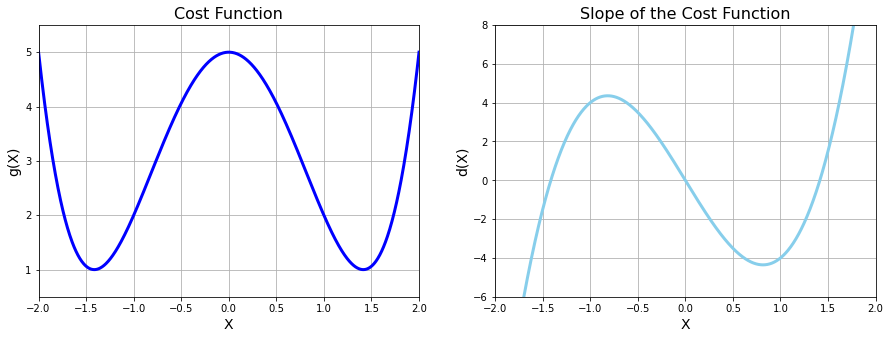

In [65]:
# plot function and derivative side by side

plt.figure(figsize=[15, 5])

# Chart-1 for cost function
plt.subplot(1, 2, 1)

plt.xlim([-2, 2])
plt.ylim([0.5, 5.5])

plt.title('Cost Function', fontsize = 16)
plt.xlabel('X', fontsize = 14)
plt.ylabel('g(X)', fontsize = 14)
plt.grid()

plt.plot(x_2, g(x_2), color = 'blue', linewidth = 3)

# Chart-2 for Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the Cost Function', fontsize = 16)
plt.xlabel('X', fontsize = 14)
plt.ylabel('d(X)', fontsize = 14)
plt.grid()

plt.xlim([-2, 2])
plt.ylim([-6, 8])

plt.plot(x_2, dg(x_2), color = 'skyblue', linewidth = 3)


plt.show()

## Gradient Descent as a Python Function

In [66]:
# def gradient_descent(derivative_func, initial_guess, multiplier, precision): (without default value)
# def gradient_descent(derivative_func, initial_guess, multiplier = 0.02, precision = 0.001):

def gradient_descent(derivative_func, initial_guess, multiplier = 0.02, precision = 0.001, max_iter = 300):
    

    new_x = initial_guess
    

    x_list = [new_x]
    slope_list =[derivative_func(new_x)]

    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient

        step_size = abs(new_x - previous_x)
        #print(step_size)

        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))

        if step_size < precision:
            #print('Loop ran this many times:', n)
            break
    return new_x, x_list, slope_list

In [67]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=0.5)
print('Local min occurs at:', local_min)
print('Number do steps:', len(list_x))

Local min occurs at: 1.4122375085019094
Number do steps: 23


In [68]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= -0.1)
print('Local min occurs at:', local_min)
print('Number do steps:', len(list_x))

Local min occurs at: -1.4120887490901561
Number do steps: 34


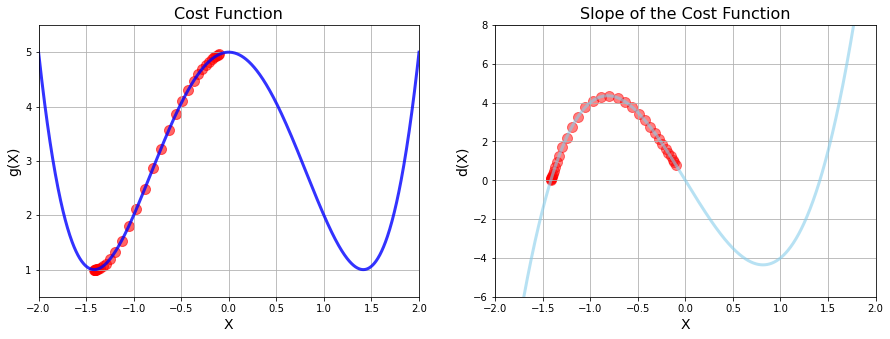

In [69]:
# Calling gradient descent function

local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= -0.1)

# plot function, derivative and scatter plot side by side

plt.figure(figsize=[15, 5])

# Chart-1 for cost function
plt.subplot(1, 2, 1)

plt.xlim([-2, 2])
plt.ylim([0.5, 5.5])

plt.title('Cost Function', fontsize = 16)
plt.xlabel('X', fontsize = 14)
plt.ylabel('g(X)', fontsize = 14)
plt.grid()

plt.plot(x_2, g(x_2), color = 'blue', linewidth = 3, alpha = 0.8)
plt.scatter(list_x, g(np.array(list_x)), color ='red', s = 100, alpha = 0.6)

# Chart-2 for Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the Cost Function', fontsize = 16)
plt.xlabel('X', fontsize = 14)
plt.ylabel('d(X)', fontsize = 14)
plt.grid()

plt.xlim([-2, 2])
plt.ylim([-6, 8])

plt.plot(x_2, dg(x_2), color = 'skyblue', linewidth = 3, alpha = 0.6)
plt.scatter(list_x, deriv_list, color ='red', s = 100, alpha = 0.5)


plt.show()

## Example 3 - Divergence, Overflow and Python Tuples

$h(x) = x^5 - 2x^4 + 2$

In [70]:
# Make Data
x_3 = np.linspace(start = -2.5, stop =2.5, num = 1000)

def h(x):
    return x**5 -2*x**4 + 2

def dh(x):
    return 5*x**4 -8*x**3

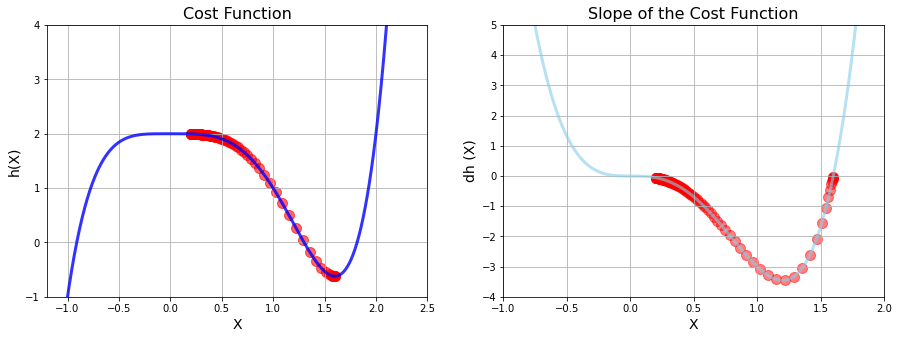

Local min occurs at: 1.5989534547394717
Cost at this minimum is: -0.6214287992331258
Number of steps: 117


In [71]:
# Calling gradient descent function

local_min, list_x, deriv_list = gradient_descent(derivative_func=dh, initial_guess= 0.2)

# plot function, derivative and scatter plot side by side

plt.figure(figsize=[15, 5])

# Chart-1 for cost function
plt.subplot(1, 2, 1)

plt.xlim([-1.2, 2.5])
plt.ylim([-1, 4])

plt.title('Cost Function', fontsize = 16)
plt.xlabel('X', fontsize = 14)
plt.ylabel('h(X)', fontsize = 14)
plt.grid()

plt.plot(x_3, h(x_3), color = 'blue', linewidth = 3, alpha = 0.8)
plt.scatter(list_x, h(np.array(list_x)), color ='red', s = 100, alpha = 0.6)

# Chart-2 for Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the Cost Function', fontsize = 16)
plt.xlabel('X', fontsize = 14)
plt.ylabel('dh (X)', fontsize = 14)
plt.grid()

plt.xlim([-1, 2])
plt.ylim([-4, 5])

plt.plot(x_3, dh(x_3), color = 'skyblue', linewidth = 3, alpha = 0.6)
plt.scatter(list_x, deriv_list, color ='red', s = 100, alpha = 0.5)


plt.show()

print('Local min occurs at:', local_min)
print('Cost at this minimum is:', h(local_min))
print('Number of steps:', len(list_x))

In [72]:
import sys

In [73]:
sys.version

'3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]'

In [74]:
sys.float_info.max

1.7976931348623157e+308

## pitfalls & Overflow Error

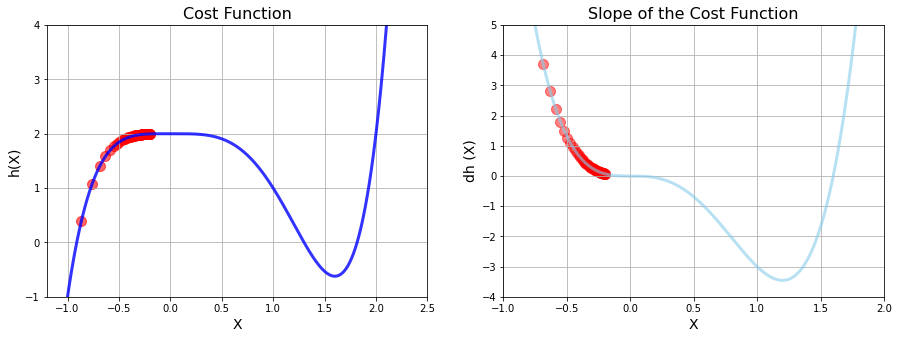

Local min occurs at: -1.8398461123332792e+24
Cost at this minimum is: -2.1081790694225687e+121
Number of steps: 72


In [76]:
# Calling gradient descent function

local_min, list_x, deriv_list = gradient_descent(derivative_func=dh, initial_guess= -0.2, max_iter = 71)

# plot function, derivative and scatter plot side by side

plt.figure(figsize=[15, 5])

# Chart-1 for cost function
plt.subplot(1, 2, 1)

plt.xlim([-1.2, 2.5])
plt.ylim([-1, 4])

plt.title('Cost Function', fontsize = 16)
plt.xlabel('X', fontsize = 14)
plt.ylabel('h(X)', fontsize = 14)
plt.grid()

plt.plot(x_3, h(x_3), color = 'blue', linewidth = 3, alpha = 0.8)
plt.scatter(list_x, h(np.array(list_x)), color ='red', s = 100, alpha = 0.6)

# Chart-2 for Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the Cost Function', fontsize = 16)
plt.xlabel('X', fontsize = 14)
plt.ylabel('dh (X)', fontsize = 14)
plt.grid()

plt.xlim([-1, 2])
plt.ylim([-4, 5])

plt.plot(x_3, dh(x_3), color = 'skyblue', linewidth = 3, alpha = 0.6)
plt.scatter(list_x, deriv_list, color ='red', s = 100, alpha = 0.5)


plt.show()

print('Local min occurs at:', local_min)
print('Cost at this minimum is:', h(local_min))
print('Number of steps:', len(list_x))